<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [28]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 3
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 0.75
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072338859288741, 0.8227553207255176]
  * f(x_sol) = 100
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]
--------------------------------------

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

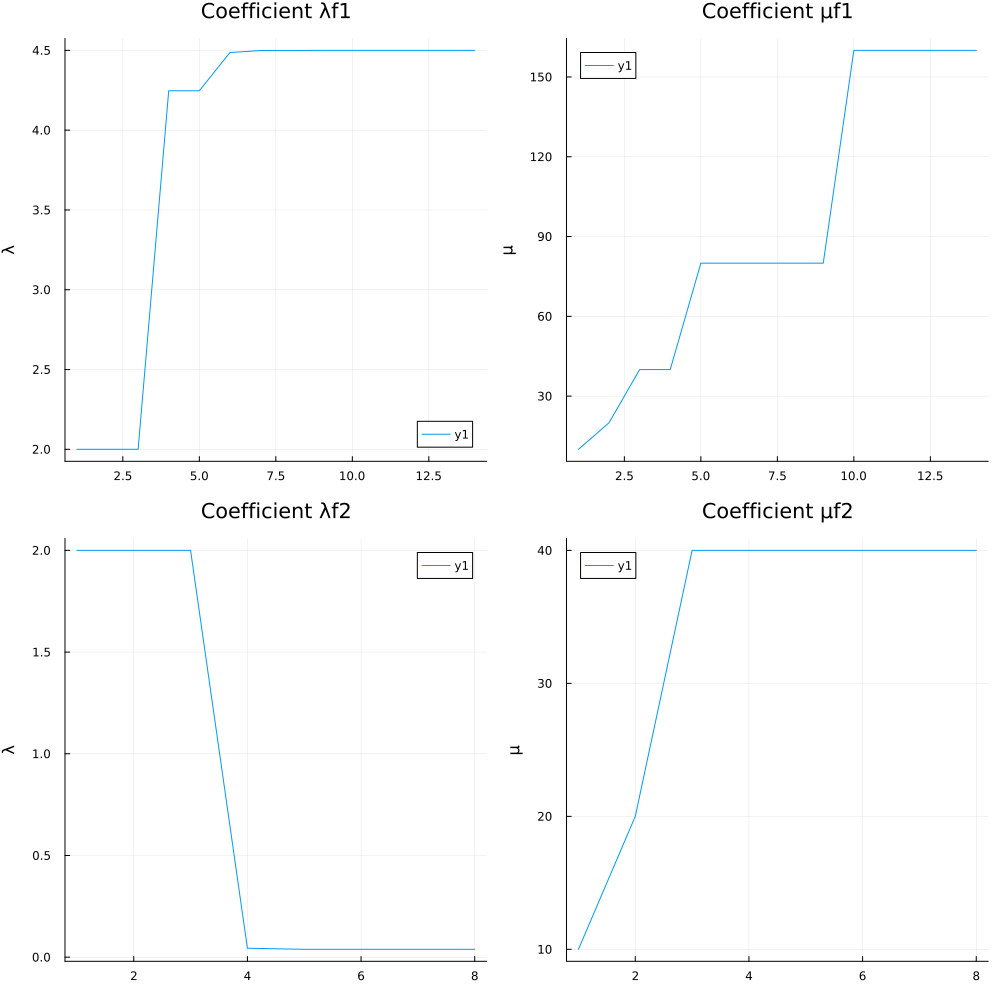

In [29]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plotsinclude("../src/regions_de_confiance.jl")
include("../src/newton.jl")
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Fonction de test 1
_,_,_,_,μf1,λf1 = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="newton")

# 𝜆𝑘
λ_courbe_1 = plot(λf1, xlabel = "", ylabel = "λ", title = "Coefficient λf1")

# 𝜇𝑘
μ_courbe_1 = plot(μf1, xlabel = "", ylabel = "μ", title = "Coefficient μf1")

# Fonction de test 2
_,_,_,_,μf2,λf2 = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, x04)

# 𝜆𝑘
λ_courbe_2 = plot(λf2, xlabel = "", ylabel = "λ", title = "Coefficient λf2")

# 𝜇𝑘
μ_courbe_2 = plot(μf2, xlabel = "", ylabel = "μ", title = "Coefficient μf2")

# Affichage des courbes
plot(λ_courbe_1, μ_courbe_1, λ_courbe_2, μ_courbe_2, layout = (2,2), size = (1000,1000))

1.=> On remarque que le facteur de pénalité μ augmente beaucoup plus dans la résolution du problème 1. Cela s'explique par le fait que pour la fonction f1, l'optimisation atteint rapidement une solution qui respecte les contraintes du problème. En revanche, pour la fonction f2, l'algorithme prend plus de temps pour se rapprocher de la solution réalisable, ce qui explique la différence de pente entre les deux courbes de μ.
Pour λ, on remarque qu'il augmente au fur et à mesure des itérations, ce qui montre que l'optimisation commence à s'écarter des contraintes. À l'inverse, pour la fonction f2, λ diminue au fil des itérations. 